# Selección de cripto activos para una cartera de inversión

![picture](https://drive.google.com/uc?export=view&id=1ihM3JEKP-XPaoX9b5bwymu_IF4ntTlz-)

# Trabajo Práctico 3 -  Aprendizaje Supervisado

# Introducción

Una tarea fundamental en el modelado financiero es la predicción del comportamiento de los precios en un futuro cercano. Usando la serie de precios histórica de los activos como datos de entrenamiento, deseamos predecir si el precio subirá o no, y en qué medida, es decir, nos interesa también el rendimiento.

La predicción de retornos de criptoactivos es un gran desafío para la comunidad de aprendizaje automático debido a la alta volatilidad de los activos, la manipulación del mercado y la naturaleza no estacionaria de los datos, entre otras cuestiones.  

En este práctico aplicaremos algunas técnicas de aprendizaje automático supervisado para predecir el movimiento de activos, a partir de los features que hemos trabajado en el práctico anterior. Exploraremos modelos simples de regresión y clasificación. Para validar los modelos procedemos a evaluar su bondad de ajuste, es decir, que "tan bueno" es el poder predictivo del modelo y comparar su desempeño.

📌 **Conjunto de Entrenamiento y Test**

Para entrenar modelos de ML y seleccionar el más adecuado, debemos particionar los datos en conjuntos de entrenamiento y test (o entrenamiento, validación y test). Si bien la práctica más habitual es seleccionar estos conjuntos al azar, esta metodología no es conveniente cuando trabajamos con series de tiempo, ya que romper la estructura de los datos significa romper la autocorrelación, que es lo que da sentido al análisis. Frente a esto, una posibilidad es realizar la división de datos a partir del procedimiento [Walk-Forward Validation](https://machinelearningmastery.com/backtest-machine-learning-models-time-series-forecasting/), otra es implementar lo que se conoce como [timeSeriesSplit](https://scikit-learn.org/stable/modules/cross_validation.html#time-series-split).

¡Los invito a indagar sobre estas metodologías!


📌 **Variables Predictoras**

Los predictores son datos que consideramos relevantes para el comportamiento del mercado. En nuestro caso, trabajaremos con los indicadores técnicos calculados en el trabajo práctico anterior y algunos que sumaremos al análisis, pero estos pueden ser muy diversos, como datos de sentimiento, datos de amplitud, datos básicos, gubernamentales, etc., que nos ayudarán a hacer nuestras predicciones. 



📌 **Modelo Baseline**

Establecer un baseline es esencial para cualquier problema de predicción. Este modelo nos brinda un punto de comparación, nos da una idea de cuan bien otros modelos rindieron en el problema en cuestión.

Si la performance de un modelo no alcanza o es similiar a la del baseline, entonces debemos seguir trabajando para mejorar el modelo u optar por algún otro. Nuestro baseline debe ser fácil de implementar y naive. 


Algunas opciones simples para baseline: [link](https://medium.com/analytics-vidhya/benchmarking-methods-for-deep-learning-based-time-series-forecast-ec45f78b61e2).

# 📖 ¡Actividades!

En este práctico evaluaremos el potencial de modelos predictivos simples sobre algunos activos. Esta será la base para construir una canasta de activos con riesgo controlado. 

**Objetivo: predecir el movimiento del precio de cada activo para los próximos n días (tomaremos n=1, n=7)**

## Parte 0 - Feature Engineer

Los invito a explorar y agregar otras características además de las trabajadas anteriormente. Como en el práctico pasado, pueden usar la librería talib o calcularlos ustedes.

- [Indicadores técnicos](https://coinmarketcap.com/alexandria/article/technical-analysis-101-the-best-technical-indicators-for-crypto-and-stocks)
- [Indicadores técnicos en python](https://towardsdatascience.com/building-a-comprehensive-set-of-technical-indicators-in-python-for-quantitative-trading-8d98751b5fb)

## Parte I - Clasificación

Por ahora nos concentraremos en predecir si el precio del activo subirá o bajará (es decir, si el retorno a n días será positivo o negativo). Para ello entrenaremos algunos modelos de clasificación.

- DecisionTreeClassifier
- RandomForestClassifier
- XGBClassifier

En este caso, podemos definir nuestro target como 1 o 0:

- Si el rendimiento a n días fue positivo el target tomará el valor 1.
- Si el rendimiento a n días fue negativo o cero el target tomará el valor 0.

Utilicen métricas adecuadas para la evaluación de los modelos (accuracy, recall, precision, etc) 


## Parte II - Regresión

Ahora nuestro objetivo es implementar modelos sobre los activos para predecir su tasa de cambio (ya sea respecto al precio open o close). Consideren los modelos de regresión:

- Desicion tree
- Randon Forest
- XGBoost


Evalúen los resultados, con algunas métricas útiles, tales como Error Cuadrático Medio (RMSE) y el Error Absoluto Medio (MAE). ¿Qué pueden decir?


### ¡Para tener en cuenta!

- Para los modelos de regresión y clasificación elijan un modelo baseline.
- Definir periodos de entrenamiento y test: utilizar librerías adecuadas para series de tiempo.
- Dado el periodo de entrenamiento, chequeen si los datos están balaceados.  
- Analicen la necesidad de estandarizar los datos, según los modelos empleados.
- Ajuste de hiperparámetros de los modelos: dado que los parámetros pueden tomar valores en un amplio rango es recomendable uilizar GridSearchCV. 



## Opcional - Predicción usando Long short-term memory (LSTM)

Las redes de este tipo son adecuadas para clasificar, procesar y hacer predicciones basadas en datos de series temporales, ya que pueden almacenar información pasada. Esto es importante en nuestro caso porque el precio anterior de una acción es crucial para predecir su precio futuro.

Comparen la performance de los modelos anteriores (regresión y/o clasificación) con una red neuronal recurrente (LSTM). 

# Fecha de entrega

- __Versión preliminar: 29/7__ 

# Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis desarrollado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 

In [1]:
import pandas as pd
import numpy as np

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

from scipy.stats import norm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from pylab import rcParams
import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from pandas import Series, DataFrame


import seaborn as sns
import os
import time
import missingno as msno

import talib as ta
import datetime as dt

import warnings
warnings.filterwarnings("ignore") 

C:\Users\Dicsys\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [2]:
df = pd.read_csv('../2tp_analisisYCuracion/Activos limpios con features - 2tp - Final.csv',index_col = 0)

In [3]:
df.head()

,open,high,low,close,volume,active,day,month,year,weekday,...,ADX200,STOCH_SLOWK,STOCH_SLOWD,MACD,SMA_5,SMA_15,SMA_ratio,SMA5_Volume,SMA15_Volume,SMA_Volume_Ratio
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# df.drop(columns=['day','month','year','ADX200','STOCH_SLOWK','STOCH_SLOWD','MACD','SMA_5','SMA_15','SMA_ratio','SMA5_Volume','SMA_Volume_Ratio','weekday','profit','real_volume','RSI5','RSI15','RSI50'
# ,'RSI100','RSI200','ADX15','ADX50','ADX100','SMA15_Volume','EMA5','EMA15','EMA50','EMA100','EMA200','ADX5'], inplace=True)

In [4]:
df_BTC = df[df.active =='BTCUSDT']

In [5]:
df_BTC_close = df_BTC['close']
df_BTC_close = pd.DataFrame(df_BTC_close)
df_BTC_close.index

Index(['2019-01-01 03:00:00', '2019-01-01 07:00:00', '2019-01-01 11:00:00',
       '2019-01-01 15:00:00', '2019-01-01 19:00:00', '2019-01-01 23:00:00',
       '2019-01-02 03:00:00', '2019-01-02 07:00:00', '2019-01-02 11:00:00',
       '2019-01-02 15:00:00',
       ...
       '2022-04-30 23:00:00', '2022-05-01 03:00:00', '2022-05-01 07:00:00',
       '2022-05-01 11:00:00', '2022-05-01 15:00:00', '2022-05-01 19:00:00',
       '2022-05-01 23:00:00', '2022-05-02 03:00:00', '2022-05-02 07:00:00',
       '2022-05-02 11:00:00'],
      dtype='object', name='Fecha', length=7288)

In [6]:
df_BTC_close.index = pd.to_datetime(df_BTC_close.index)

In [7]:
df_BTC_close.sort_values(by='Fecha', ascending=True)

,close
Fecha,
2019-01-01 03:00:00,3703.56
2019-01-01 07:00:00,3713.07
2019-01-01 11:00:00,3698.53
2019-01-01 15:00:00,3659.41
2019-01-01 19:00:00,3711.20
...,...
2022-05-01 19:00:00,38306.63
2022-05-01 23:00:00,38621.62
2022-05-02 03:00:00,38926.11


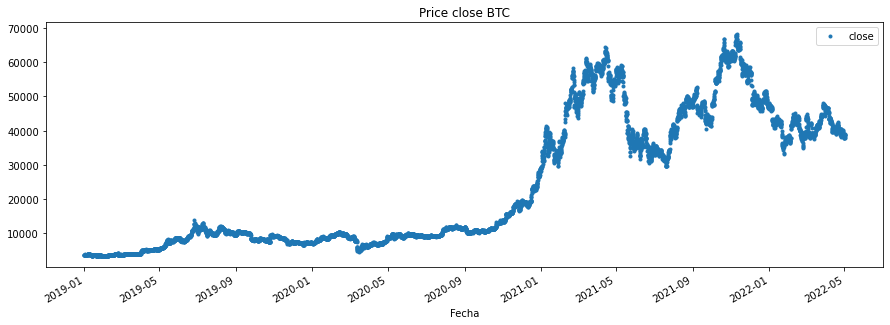

In [8]:
# Gráfico
# ==============================================================================
df_BTC_close.plot(style='.',figsize=(15,5),title= 'Price close BTC')
plt.show()

## Train / Test split

In [30]:
# train = df_BTC_close.loc[df_BTC_close.index < '01-09-2022']
# test = df_BTC_close.loc[df_BTC_close.index >= '01-09-2022']

,close
Fecha,
2022-01-09 03:00:00,41873.62
2022-01-09 07:00:00,41644.70
2022-01-09 11:00:00,41535.93
2022-01-09 15:00:00,41966.99
2022-01-09 19:00:00,42205.37
...,...
2022-05-01 19:00:00,38306.63
2022-05-01 23:00:00,38621.62
2022-05-02 03:00:00,38926.11


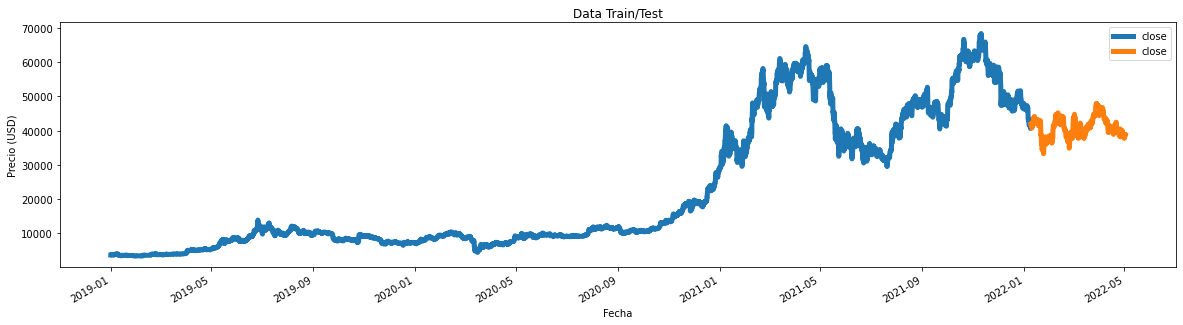

In [52]:
# fig, ax = plt.subplots(figsize=(20,5))

# train.plot(ax=ax,linewidth=5)
# test.plot(ax=ax,linewidth=5)

# ax.set_title('Data Train/Test')
# ax.set_ylabel('Precio (USD)')
# ax.legend();

In [56]:
# def create_features(df):
    
#     df['hour'] = df.index.hour
#     df['dayofweek'] = df.index.dayofweek
#     df['month'] = df.index.month
#     df['year'] = df.index.year
    
#     return df

In [58]:
# train = create_features(train)
# test = create_features(test)

In [60]:
# train.columns

Index(['close', 'hour', 'dayofweek', 'month', 'year'], dtype='object')

In [61]:
# Features = ['hour', 'dayofweek', 'month', 'year']
# Target = ['close']

In [62]:
# X_train = train[Features]
# y_train = train[Target]

# X_test = test[Features]
# y_test = test[Target]

In [93]:
# from xgboost import XGBRegressor

# reg = XGBRegressor(n_estimators=1000,early_stopping_rounds=500,learning_rate=0.01)

# reg.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)],verbose=100)

[0]	validation_0-rmse:28965.64982	validation_1-rmse:40609.62704
[100]	validation_0-rmse:10942.92147	validation_1-rmse:9317.96073
[200]	validation_0-rmse:4740.27557	validation_1-rmse:5634.78519
[300]	validation_0-rmse:3036.56757	validation_1-rmse:9087.68869
[400]	validation_0-rmse:2717.76460	validation_1-rmse:10512.12603
[500]	validation_0-rmse:2665.91687	validation_1-rmse:11094.10404
[600]	validation_0-rmse:2655.64864	validation_1-rmse:11390.15313
[658]	validation_0-rmse:2653.26740	validation_1-rmse:11484.04065


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=500, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

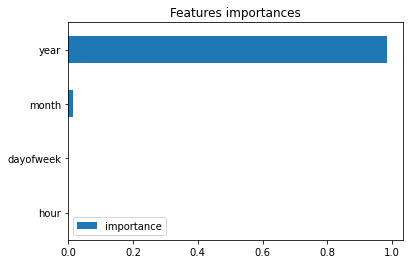

In [82]:
# fi = pd.DataFrame(data=reg.feature_importances_, index=reg.feature_names_in_,columns=['importance'])
# fi.sort_values('importance').plot(kind='barh', title = 'Features importances')
# plt.show()

In [84]:
# test['predict'] = reg.predict(X_test)

In [86]:
# df_BTC_close = df_BTC_close.merge(test[['predict']],how='left',left_index=True,right_index=True)

In [88]:
# df_BTC_close

,close,predict
Fecha,,
2019-01-01 03:00:00,3703.56,NaN
2019-01-01 07:00:00,3713.07,NaN
2019-01-01 11:00:00,3698.53,NaN
2019-01-01 15:00:00,3659.41,NaN
2019-01-01 19:00:00,3711.20,NaN
...,...,...
2022-05-01 19:00:00,38306.63,37241.679688
2022-05-01 23:00:00,38621.62,37241.679688
2022-05-02 03:00:00,38926.11,37241.679688


<function matplotlib.pyplot.show(*args, **kw)>

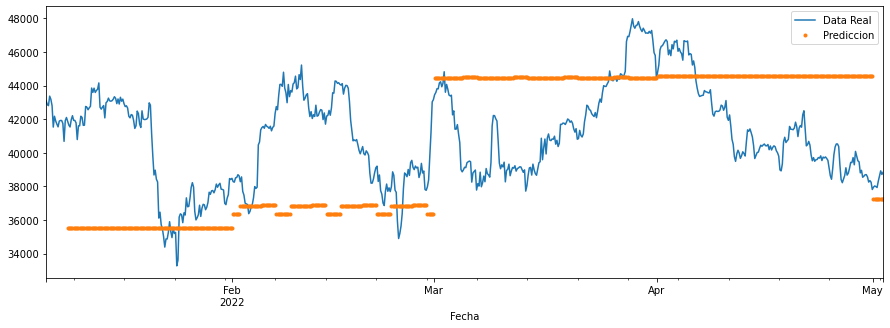

In [92]:
# ax = df_BTC_close.loc[(df_BTC_close.index > '01-01-2022') & (df_BTC_close.index > '01-06-2022')]['close'].plot(figsize=(15,5))

# df_BTC_close.loc[(df_BTC_close.index > '01-01-2022') & (df_BTC_close.index > '01-06-2022')]['predict'].plot(style='.')
    
# plt.legend(['Data Real','Prediccion'])
# plt.show

In [28]:
# Selección fechas train-test
# ==============================================================================
inicio_train = '2022-01-01 00:00:00'
fin_train = '2022-03-01 00:00:00'

print(f"Serie temporal completa : {df_BTC_close.index.min()} --- {df_BTC_close.index.max()}  (n={len(df_BTC_close)})")
print(f"Fechas train            : {df_BTC_close.loc[inicio_train:fin_train].index.min()} --- {df_BTC_close.loc[inicio_train:fin_train].index.max()}  (n={len(df_BTC_close.loc[inicio_train:fin_train])})")
print(f"Fechas test             : {df_BTC_close.loc[fin_train:].index.min()} --- {df_BTC_close.loc[fin_train:].index.max()}  (n={len(df_BTC_close.loc[fin_train:])})")

Serie temporal completa : 2019-01-01 03:00:00 --- 2022-05-02 11:00:00  (n=7288)
Fechas train            : 2022-01-01 03:00:00 --- 2022-02-28 23:00:00  (n=354)
Fechas test             : 2022-03-01 03:00:00 --- 2022-05-02 11:00:00  (n=375)


In [39]:
# Simulación Random Walk
# ==============================================================================
df_rw = df_BTC_close[['close']].copy()
df_rw['pred_close'] = df_rw['close'].shift(1)

# Error de test
# ==============================================================================
y_true = df_rw.loc[fin_train:, 'close']
y_pred = df_rw.loc[fin_train:, 'pred_close']
metrica = mean_absolute_error(y_true, y_pred)

print(f'Error de test: {metrica}')
df_rw

Error de test: 319.1033333333332


,close,pred_close
Fecha,,
2019-01-01 03:00:00,3703.56,NaN
2019-01-01 07:00:00,3713.07,3703.56
2019-01-01 11:00:00,3698.53,3713.07
2019-01-01 15:00:00,3659.41,3698.53
2019-01-01 19:00:00,3711.20,3659.41
...,...,...
2022-05-01 19:00:00,38306.63,37934.91
2022-05-01 23:00:00,38621.62,38306.63
2022-05-02 03:00:00,38926.11,38621.62


In [40]:
df_rw.index = pd.to_datetime(df_rw.index)

In [41]:
df_rw = df_rw.dropna()

In [42]:
df_rw

,close,pred_close
Fecha,,
2019-01-01 07:00:00,3713.07,3703.56
2019-01-01 11:00:00,3698.53,3713.07
2019-01-01 15:00:00,3659.41,3698.53
2019-01-01 19:00:00,3711.20,3659.41
2019-01-01 23:00:00,3783.28,3711.20
...,...,...
2022-05-01 19:00:00,38306.63,37934.91
2022-05-01 23:00:00,38621.62,38306.63
2022-05-02 03:00:00,38926.11,38621.62


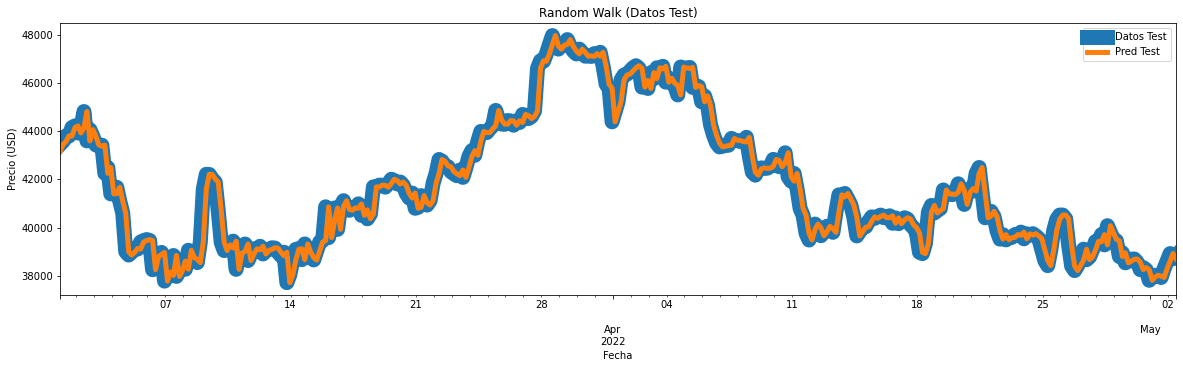

In [43]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(20,5))
df_rw.loc[fin_train:, 'close'].plot(ax=ax, linewidth=15, label='Datos Test')
df_rw.loc[fin_train:, 'pred_close'].plot(ax=ax, linewidth=5, label='Pred Test')
ax.set_title('Random Walk (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

In [45]:
# DataFrame errores test modelos
# ==============================================================================
df_errores = pd.DataFrame({'modelo': 'Base - Random Walk', 'lags': 1, 
                           'error_test': metrica, 'variables_exog': False},
                          index=[0])
df_errores

,modelo,lags,error_test,variables_exog
0,Base - Random Walk,1,319.103333,False


In [46]:
df_BTC_close.index = pd.to_datetime(df_BTC_close.index)

In [47]:
df_BTC_close

,close
Fecha,
2019-01-01 03:00:00,3703.56
2019-01-01 07:00:00,3713.07
2019-01-01 11:00:00,3698.53
2019-01-01 15:00:00,3659.41
2019-01-01 19:00:00,3711.20
...,...
2022-05-01 19:00:00,38306.63
2022-05-01 23:00:00,38621.62
2022-05-02 03:00:00,38926.11


In [48]:
df_BTC_close['pred_close'] = df_BTC_close['close'].shift(6)

In [51]:
data = df_BTC_close.dropna()

In [55]:
datos_train.index = pd.to_datetime(datos_train.index) 

NameError: name 'datos_train' is not defined

In [27]:
datos_test.index = pd.to_datetime(datos_test.index)

In [47]:
datos_test

,open,high,low,close,volume,pred_close
Fecha,,,,,,
2022-04-26 15:00:00,39274.40,39361.21,38000.18,38408.86,20830.05635,39887.03
2022-04-26 19:00:00,38408.86,38577.77,37713.31,38221.01,12783.95315,40346.97
2022-04-26 23:00:00,38221.00,38444.80,37702.26,38426.55,8252.78397,40524.32
2022-04-27 03:00:00,38426.56,38703.98,38311.30,38646.71,4625.14810,40524.27
2022-04-27 07:00:00,38646.71,39221.65,38599.15,39108.57,10905.07280,40372.00
2022-04-27 11:00:00,39108.58,39474.72,38435.95,38672.62,16976.29805,39274.40
2022-04-27 15:00:00,38672.62,39309.00,38635.91,38785.71,12769.24440,38408.86
2022-04-27 19:00:00,38785.72,39399.99,38668.20,39074.34,6144.01703,38221.01
2022-04-27 23:00:00,39074.35,39689.49,39056.41,39429.10,5364.69464,38426.55


In [40]:
datos_train = datos_train['pred_close']

In [56]:
datos_train

,pred_close
Fecha,
2019-01-02 03:00:00,3703.56
2019-01-02 07:00:00,3713.07
2019-01-02 11:00:00,3698.53
2019-01-02 15:00:00,3659.41
2019-01-02 19:00:00,3711.20
...,...
2022-04-25 19:00:00,39548.32
2022-04-25 23:00:00,39091.17
2022-04-26 03:00:00,38636.35


In [58]:
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
             )

forecaster.fit(y=datos_train)
forecaster

Exception: `y` must be a pandas Series.

In [46]:
# Predicciones
# ==============================================================================
steps = 36
forecaster.predict(steps=steps)
# Add datetime index to predictions
# predicciones = pd.Series(data=predicciones, index=datos_test.index)
# predicciones.index = pd.Series(data=predicciones, index=datos_test.index)

predicciones.head(5)

7246    39454.7942
7247    39472.4489
7248    39477.9418
7249    39036.6901
7250    38871.2853
Name: pred, dtype: float64

In [90]:
datos_test.drop('active', inplace=True, axis=1)

KeyError: "['active'] not found in axis"

In [91]:
datos_train.drop('active', inplace=True, axis=1)

In [93]:
from sklearn.metrics import mean_squared_error

# Prediction error
# ==============================================================================
error_mse = mean_squared_error(
                y_true = datos_test,
                y_pred = predicciones
            )
print(f"Test error (mse): {error_mse}")

# # Plot
# # ==============================================================================
# fig, ax=plt.subplots(figsize=(9, 4))
# datos_train.plot(ax=ax, label='train')
# datos_test.plot(ax=ax, label='test')
# predicciones.plot(ax=ax, label='predicciones')
# ax.legend();

ValueError: Input contains NaN.

TypeError: index type not supported

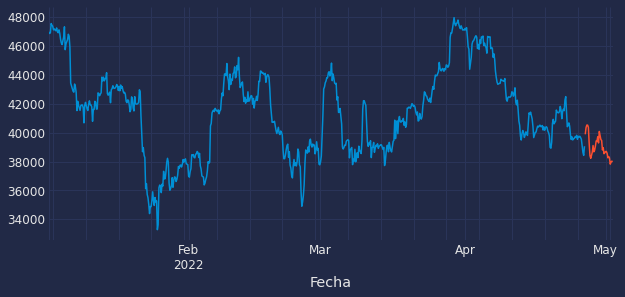

In [67]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['pred_close'].plot(ax=ax, label='train')
datos_test['pred_close'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label='predicciones')
ax.legend();

## Parte 0 - Feature Engineer

### Funciones

In [35]:
df.head(10)

,Fecha,open,high,low,close,volume,active,day,month,year,weekday,profit
0,2019-01-01 03:00:00,0.34640,0.35368,0.34617,0.35073,5.565085e+06,XRPUSDT,1,1,2019,Tuesday,1.250000
1,2019-01-01 03:00:00,130.72000,134.00000,130.71000,133.36000,4.847789e+04,ETHUSDT,1,1,2019,Tuesday,2.019584
2,2019-01-01 03:00:00,2.52060,2.56000,2.52040,2.53830,4.744196e+05,EOSUSDT,1,1,2019,Tuesday,0.702214
3,2019-01-01 03:00:00,0.03988,0.04068,0.03985,0.04061,1.281178e+07,ADAUSDT,1,1,2019,Tuesday,1.830491
4,2019-01-01 03:00:00,29.73000,30.16000,29.57000,30.12000,1.034450e+04,LTCUSDT,1,1,2019,Tuesday,1.311806
5,2019-01-01 03:00:00,7.37400,7.43000,7.35200,7.40900,3.906782e+04,NEOUSDT,1,1,2019,Tuesday,0.474641
6,2019-01-01 03:00:00,5.93170,5.95460,5.85000,5.95030,2.516747e+05,BNBUSDT,1,1,2019,Tuesday,0.313569
7,2019-01-01 03:00:00,4.94190,5.11270,4.93790,5.04560,4.550184e+04,ETCUSDT,1,1,2019,Tuesday,2.098383
8,2019-01-01 03:00:00,3690.00000,3720.00000,3685.78000,3703.56000,3.346850e+03,BTCUSDT,1,1,2019,Tuesday,0.367480
9,2019-01-01 07:00:00,5.04560,5.13000,5.02720,5.05110,3.769894e+04,ETCUSDT,1,1,2019,Tuesday,0.109006


In [48]:
def status(data):

    data2=data 

    # total de rows
    tot_rows=len(data2)
    
    # total de nan
    d2=data2.isnull().sum().reset_index()
    d2.columns=['variable', 'Cant_nan']
    
    # percentage of nan
    d2[['%_nan']]=(d2[['Cant_nan']]/tot_rows) * 100
    
    # num of zeros
    d2['Cant_zeros']=(data2==0).sum().values

    # perc of zeros
    d2['%_zeros']=(d2[['Cant_zeros']]/tot_rows) * 100

    # total unique values
    d2['unique']=data2.nunique().values
    
    #get num of tot_rows
    d2['tot_rows'] = tot_rows
    
    # get data types per column
    d2['type']=[str(x) for x in data2.dtypes.values]
    
    return(d2)

In [49]:
status(df)

,variable,Cant_nan,%_nan,Cant_zeros,%_zeros,unique,tot_rows,type
0,Fecha,0,0.0,0,0.000000,7288,116029,object
1,open,0,0.0,0,0.000000,82723,116029,float64
2,high,0,0.0,0,0.000000,77211,116029,float64
3,low,0,0.0,0,0.000000,77289,116029,float64
4,close,0,0.0,0,0.000000,82461,116029,float64
5,volume,0,0.0,0,0.000000,115771,116029,float64
6,active,0,0.0,0,0.000000,19,116029,object
7,day,0,0.0,0,0.000000,31,116029,int64
8,month,0,0.0,0,0.000000,12,116029,int64
9,year,0,0.0,0,0.000000,4,116029,int64


In [50]:
df_volume = pd.DataFrame(columns=['active','volume','porcentaje'])
df_volume

,active,volume,porcentaje


In [51]:
i = 0
for active in set(df.active):
    df_volume.loc[i, 'volume'] = df[df.active == active]['volume'].mean()
    df_volume.loc[i, 'active'] = active
    df_volume.loc[i, 'porcentaje'] = (df[df.active == active]['volume'].sum() / df['volume'].sum()) * 100
    i += 1

df_volume.sort_values(by='volume', ascending=False).reset_index(drop=True)

,active,volume,porcentaje
0,DOGEUSDT,3.74346e+08,71.2369
1,XRPUSDT,6.81836e+07,15.3014
2,ADAUSDT,5.213e+07,11.6988
3,EOSUSDT,3.06511e+06,0.687857
4,DOTUSDT,2.1997e+06,0.25231
5,LUNAUSDT,1.39154e+06,0.158969
6,LINKUSDT,1.30193e+06,0.288485
7,AXSUSDT,840527,0.084349
8,BNBUSDT,420725,0.094417
9,ETCUSDT,407064,0.0913513


In [54]:
top_volume = list(df_volume.sort_values(by='volume', ascending = False)['active'].head(5))
df_filtered = df[df.active.isin(top_volume)]

In [55]:
df_all = df_filtered.set_index('Fecha', inplace = True)
df_all = df_filtered.sort_values(by=['Fecha'],ascending=False)

In [56]:
df_all[:3]

,open,high,low,close,volume,active,day,month,year,weekday,profit,real_volume
Fecha,,,,,,,,,,,,
2022-05-02 11:00:00,0.7786,0.7862,0.7676,0.7786,39307057.3,ADAUSDT,2,5,2022,Monday,0.000000,3.060447e+07
2022-05-02 11:00:00,2.0710,2.1090,2.0340,2.0940,3760029.1,EOSUSDT,2,5,2022,Monday,1.110575,7.873501e+06
2022-05-02 11:00:00,0.6147,0.6170,0.6035,0.6125,91092157.0,XRPUSDT,2,5,2022,Monday,-0.357898,5.579395e+07


In [57]:
df_all.corr()

,open,high,low,close,volume,day,month,year,profit,real_volume
open,1.000000,0.999753,0.999496,0.999516,-0.069395,-0.011208,-0.001363,0.266089,-0.007822,0.068984
high,0.999753,1.000000,0.999401,0.999755,-0.069135,-0.011089,-0.002039,0.266106,-0.000688,0.071450
low,0.999496,0.999401,1.000000,0.999704,-0.069662,-0.011561,-0.000554,0.266028,0.001048,0.065656
close,0.999516,0.999755,0.999704,1.000000,-0.069370,-0.011339,-0.001464,0.266035,0.005403,0.068962
volume,-0.069395,-0.069135,-0.069662,-0.069370,1.000000,0.002068,-0.068191,0.086238,0.197085,0.519930
day,-0.011208,-0.011089,-0.011561,-0.011339,0.002068,1.000000,0.013504,-0.012209,-0.002017,-0.009144
month,-0.001363,-0.002039,-0.000554,-0.001464,-0.068191,0.013504,1.000000,-0.272287,-0.019708,-0.049909
year,0.266089,0.266106,0.266028,0.266035,0.086238,-0.012209,-0.272287,1.000000,0.006689,0.217942
profit,-0.007822,-0.000688,0.001048,0.005403,0.197085,-0.002017,-0.019708,0.006689,1.000000,0.106127
real_volume,0.068984,0.071450,0.065656,0.068962,0.519930,-0.009144,-0.049909,0.217942,0.106127,1.000000


Aunque se dispone de una serie temporal amplia, esta presenta periodos con precios muy diferenciados como se ha podido determinar en la exploración.

In [58]:
for cripto in set(df_all.active):
    print("La moneda {} tiene valores entre {} y {}".format(cripto, df_all[df_all.active == cripto].index.min(), df_all[df_all.active == cripto].index.max()))

La moneda XRPUSDT tiene valores entre 2019-01-01 03:00:00 y 2022-05-02 11:00:00
La moneda DOTUSDT tiene valores entre 2020-08-18 23:00:00 y 2022-05-02 11:00:00
La moneda EOSUSDT tiene valores entre 2019-01-01 03:00:00 y 2022-05-02 11:00:00
La moneda ADAUSDT tiene valores entre 2019-01-01 03:00:00 y 2022-05-02 11:00:00
La moneda DOGEUSDT tiene valores entre 2019-07-05 15:00:00 y 2022-05-02 11:00:00


In [34]:
inicio_train = '2019-01-01 03:00:00'
fin_train = '2022-05-02 11:00:00'

In [27]:
# Simulación Random Walk
# ==============================================================================
for cripto in set(df_all.active):
    df_rw = df_all[['close']].copy()
    df_rw['Active'] = df_all[['active']]
    df_rw['pred_close'] = df_rw['close'].shift(5)


In [28]:
status(df_rw)

,variable,Cant_nan,%_nan,Cant_zeros,%_zeros,unique,tot_rows,type
0,close,0,0.000000,0,0.0,29215,31769,float64
1,Active,0,0.000000,0,0.0,5,31769,object
2,pred_close,1,0.003148,0,0.0,29214,31769,float64


In [30]:
df_rw['pred_close'].fillna(df_rw['pred_close'].mode()[0], inplace=True)

In [31]:
status(df_rw)

,variable,Cant_nan,%_nan,Cant_zeros,%_zeros,unique,tot_rows,type
0,close,0,0.0,0,0.0,29215,31769,float64
1,Active,0,0.0,0,0.0,5,31769,object
2,pred_close,0,0.0,0,0.0,29214,31769,float64


In [35]:
# Error de test
# ==============================================================================
y_true = df_rw.loc[fin_train:, 'close']
y_pred = df_rw.loc[fin_train:, 'pred_close']
metrica = mean_absolute_error(y_true, y_pred)

print(f'Error de test: {metrica}')
display(df_rw.loc[fin_train:,].head())

Error de test: 10720.623071092303


,close,Active,pred_close
Fecha,,,
2022-05-02 11:00:00,0.1306,DOGEUSDT,0.1410
2022-05-02 11:00:00,388.9000,BNBUSDT,0.1306
2022-05-02 11:00:00,38840.0000,BTCUSDT,388.9000
2022-05-02 11:00:00,2828.0000,ETHUSDT,38840.0000
2022-05-02 11:00:00,15.0500,DOTUSDT,2828.0000


In [42]:
df_rw.loc[fin_train:, 'close']

Fecha
2022-05-02 11:00:00        0.1306
2022-05-02 11:00:00      388.9000
2022-05-02 11:00:00    38840.0000
2022-05-02 11:00:00     2828.0000
2022-05-02 11:00:00       15.0500
                          ...    
2019-01-01 07:00:00        5.9439
2019-01-01 07:00:00      133.8600
2019-01-01 03:00:00      133.3600
2019-01-01 03:00:00     3703.5600
2019-01-01 03:00:00        5.9503
Name: close, Length: 31769, dtype: float64

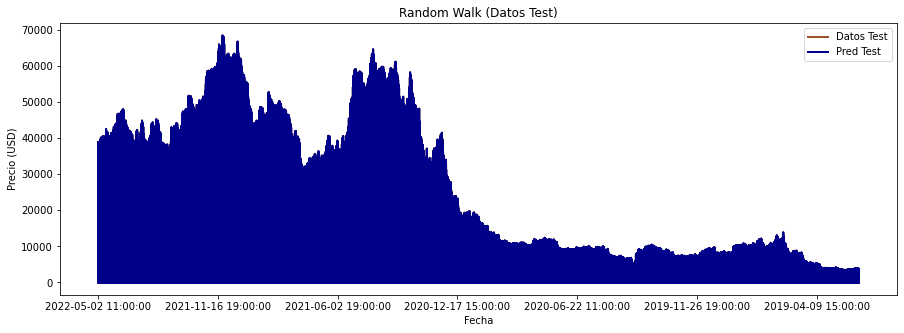

In [44]:
fig, ax = plt.subplots(figsize=(15,5))
df_rw.loc[fin_train:, 'close'].plot(ax=ax, linewidth=2, label='Datos Test',
                                    c='sienna')
df_rw.loc[fin_train:, 'pred_close'].plot(ax=ax, linewidth=2, label='Pred Test',
                                    c='darkblue')
ax.set_title('Random Walk (Datos Test)')
ax.set_ylabel('Precio (USD)')
ax.legend();

In [47]:
df_errores = pd.DataFrame({'modelo': 'DecisionTreeClassifier', 'lags': 1, 
                           'error_test': metrica, 'variables_exog': False},
                          index=[0])
df_errores

,modelo,lags,error_test,variables_exog
0,Base - Random Walk,1,10720.623071,False
